
![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)




# **Análisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*

**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web	

- Id_de_caso	fecha_de_notificaci_n	

- Departamento	

- Departamento_nom	

- Ciudad_municipio

- Ciudad_municipio_nom	

- Edad	

- Unidad_medida	

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IngridAponte/codespaces-jupyter/refs/heads/main/data/Casos1.csv')
df.head()




,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


## Paso 3: Revisar la estructura del dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID de caso               1161 non-null   int64 
 1   Fecha de diagnóstico     1161 non-null   object
 2   Ciudad de ubicación      1161 non-null   object
 3   Departamento o Distrito  1161 non-null   object
 4   Atención**               1161 non-null   object
 5   Edad                     1161 non-null   int64 
 6   Sexo                     1161 non-null   object
 7   Tipo*                    1161 non-null   object
 8   País de procedencia      1161 non-null   object
dtypes: int64(2), object(7)
memory usage: 81.8+ KB


In [4]:
# Cantidad de filas y columnas
df.shape

(1161, 9)

In [5]:
# Conteo de valores nulos
print(df.isnull().sum())

ID de caso                 0
Fecha de diagnóstico       0
Ciudad de ubicación        0
Departamento o Distrito    0
Atención**                 0
Edad                       0
Sexo                       0
Tipo*                      0
País de procedencia        0
dtype: int64


In [6]:
df_2=df.copy()
df_2['Fecha de diagnóstico'] = pd.to_datetime(df_2['Fecha de diagnóstico'], errors='coerce')


## Paso 4: Descripción estadística general

In [ ]:
df_2.describe(include='all')

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
count,1161.000000,268,1161,1161,1161,1161.000000,1161,1161,1161
unique,NaN,NaN,96,26,5,NaN,2,3,56
top,NaN,NaN,Bogotá,Bogotá D.C.,Casa,NaN,M,Importado,Colombia
freq,NaN,NaN,542,542,955,NaN,593,524,636
mean,581.000000,2020-01-29 06:32:14.328358144,NaN,NaN,NaN,42.129199,NaN,NaN,NaN
min,1.000000,2020-01-04 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,291.000000,2020-01-04 00:00:00,NaN,NaN,NaN,29.000000,NaN,NaN,NaN
50%,581.000000,2020-01-04 00:00:00,NaN,NaN,NaN,40.000000,NaN,NaN,NaN
75%,871.000000,2020-02-04 00:00:00,NaN,NaN,NaN,54.000000,NaN,NaN,NaN
max,1161.000000,2020-12-03 00:00:00,NaN,NaN,NaN,88.000000,NaN,NaN,NaN


## Paso 5: Visualización exploratoria

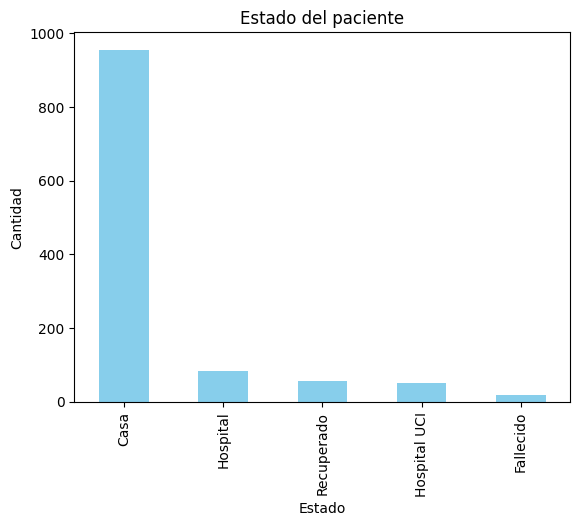

In [8]:
## Grafico de barras que muestra la cantidad de personas de acuerco con el estado,
## Para este caso, el estado corresponde a 5 opciones, si la persona contagiada con COVID-19
## se encuentra en casa, hospitalizado, fallecido, recuperado o en UCI.

df_2['Atención**'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



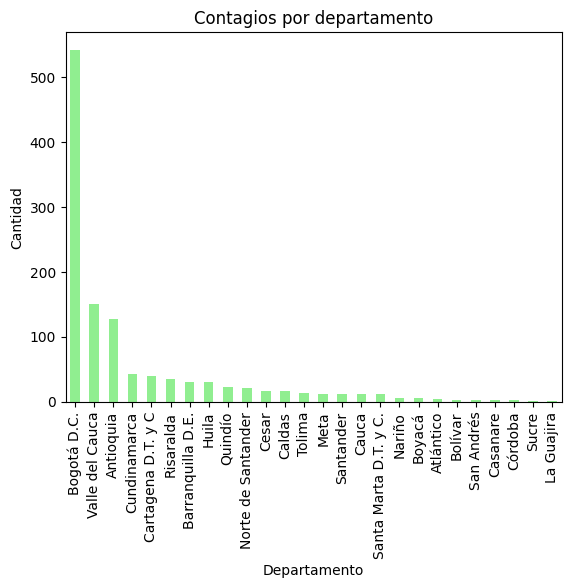

In [ ]:
## En este grafico se indica la cantidad de contagios por departamento o ciudad principal.

df_2['Departamento o Distrito'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Filtrar datos con fechas válidas
df_2 = df_2.dropna(subset=['Fecha de diagnóstico'])


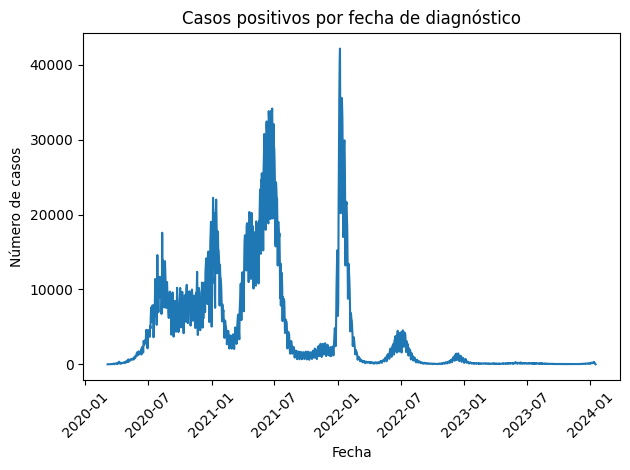

In [ ]:
# Casos por fecha de diagnóstico
casos_por_fecha = df_2.groupby(df_2['Fecha de diagnóstico'].dt.date).size()

casos_por_fecha.plot(kind='line')
plt.title("Casos positivos por fecha de diagnóstico")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

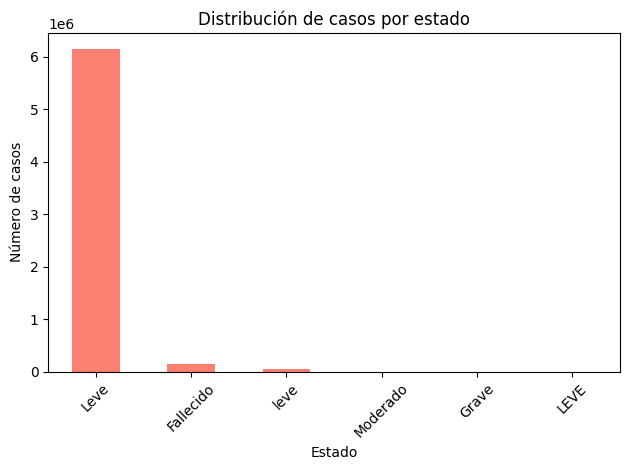

In [ ]:
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### Hayazgo: Corregir el nombre de los estados leve
df_2['Estado'] = df_2['Estado'].str.replace('leve', 'Leve')
df_2['Estado'] = df_2['Estado'].str.replace('LEVE', 'Leve')


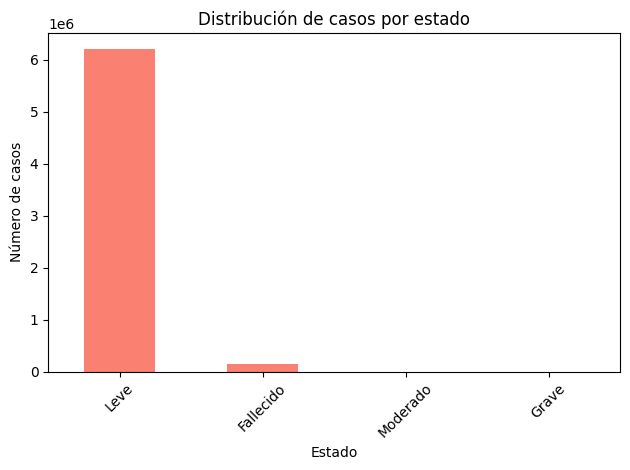

In [ ]:
## se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

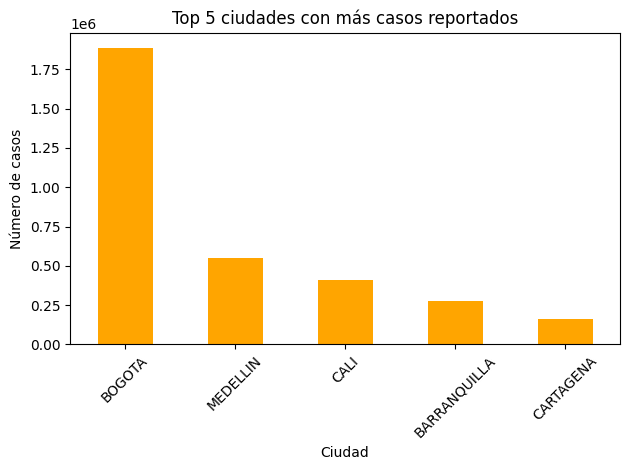

In [ ]:
# Top 10 ciudades con más casos
# -----------------------------
plt.figure()
df_2['Nombre municipio'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title("Top 5 ciudades con más casos reportados")
plt.xlabel("Ciudad")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

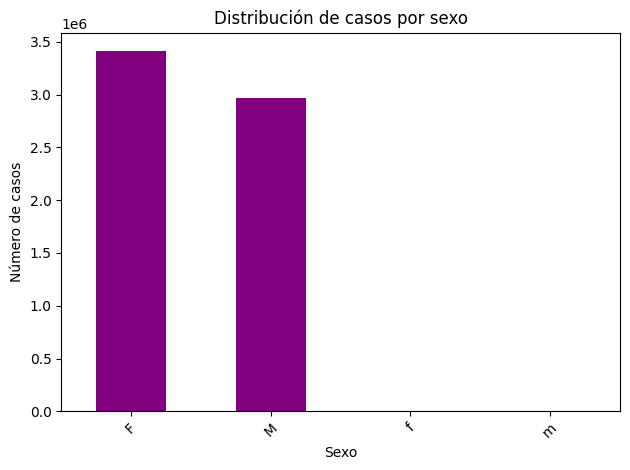

In [ ]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
##hayazgo: Corregir el nombre de los sexos
df_2['Sexo'] = df_2['Sexo'].str.replace('f', 'F')
df_2['Sexo'] = df_2['Sexo'].str.replace('m', 'M')

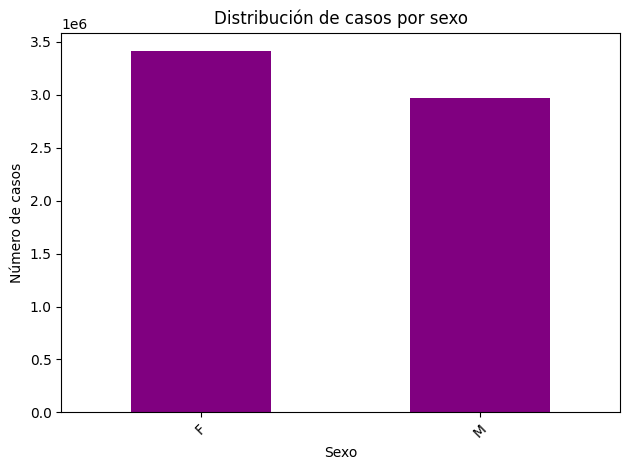

In [ ]:
##se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

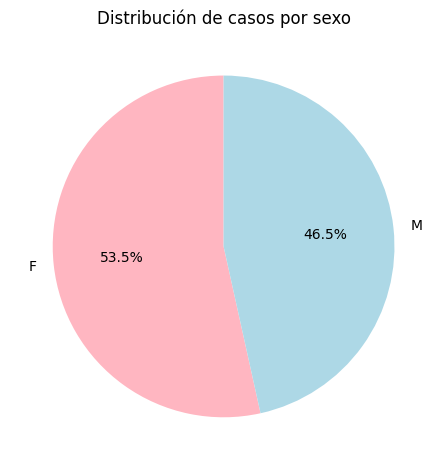

In [ ]:
# Crear gráfico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

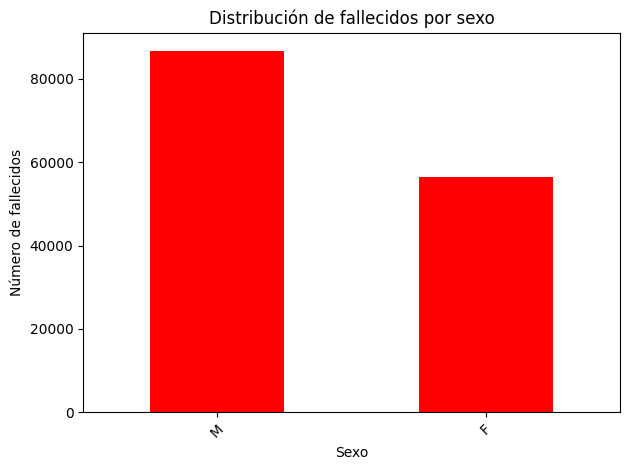

In [ ]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='red')
plt.title("Distribución de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

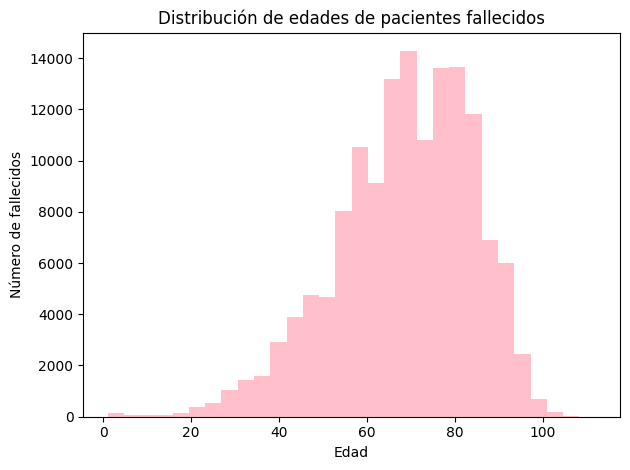

In [ ]:
#Distribución de las edades de los pacientes fallecidos
plt.figure()
df_2[df_2['Recuperado'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='pink')
plt.title("Distribución de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("Número de fallecidos")
plt.tight_layout()
plt.show()



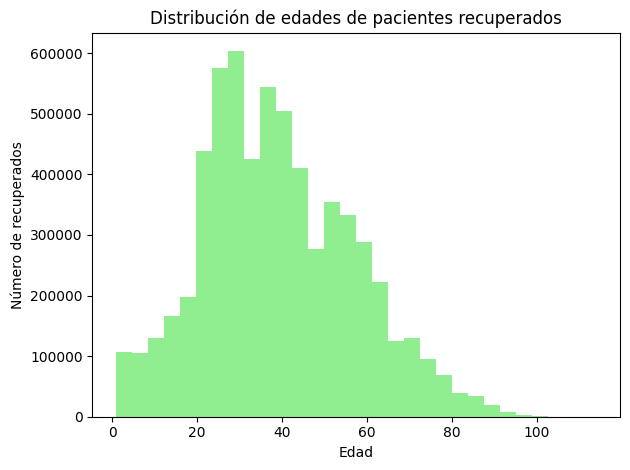

In [ ]:
# Distribución de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Recuperado'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribución de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("Número de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

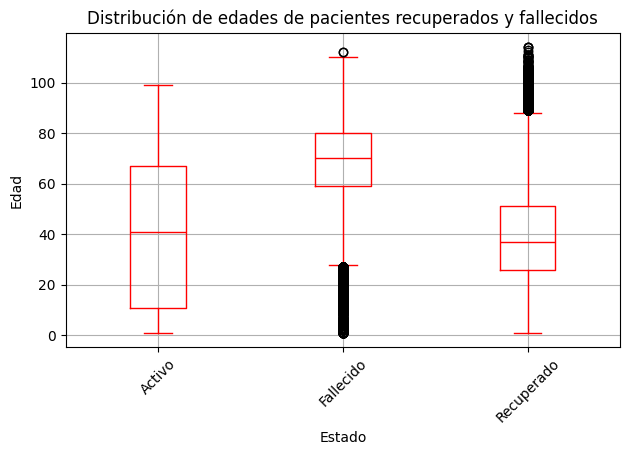

In [ ]:
# Distribución de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Recuperado', color='red')
plt.title("Distribución de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el título por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()         

/tmp/ipykernel_16169/2291965116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'], errors='coerce')
/tmp/ipykernel_16169/2291965116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Recuperado'] = df_filtrado['Recuperado'].astype(str)


6351909 6351909


<Figure size 1000x600 with 0 Axes>

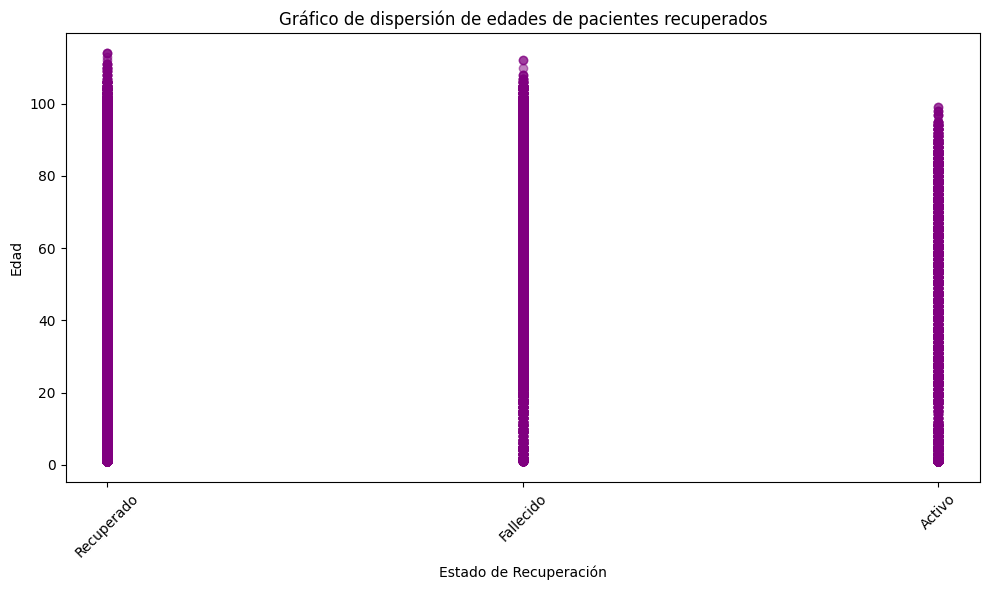

In [ ]:
# Grafico de dispersion de edades de los pacientes recuperados
plt.figure(figsize=(10, 6))

# Filtrar filas donde 'Edad' y 'Recuperado' no son NaN
df_filtrado = df_2.dropna(subset=['Edad', 'Recuperado'])

# Convertir 'Edad' a numérico (en caso no lo hayas hecho ya)
df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'], errors='coerce')

# Convertir 'Recuperado' a texto
df_filtrado['Recuperado'] = df_filtrado['Recuperado'].astype(str)

# Confirmar tamaños iguales
print(len(df_filtrado['Recuperado']), len(df_filtrado['Edad'])) 

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Recuperado'], df_filtrado['Edad'], color='purple', alpha=0.5)
plt.title("Gráfico de dispersión de edades de pacientes recuperados")
plt.xlabel("Estado de Recuperación")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_2.shape

(6388216, 23)

In [ ]:
df_2.head(10)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaT,2020-12-23,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaT,2020-12-23,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaT,2020-12-22,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30,2020-12-23,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaT,2020-12-23,2021-01-04 00:00:00,Tiempo,6.0,NaN
5,2020-12-24 00:00:00,1556984,2020-12-15 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-09 00:00:00,NaT,2020-12-23,2020-12-25 00:00:00,Tiempo,6.0,NaN
6,2020-12-24 00:00:00,1556985,2020-12-21 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Recuperado,2020-12-14 00:00:00,NaT,2020-12-22,2020-12-28 00:00:00,Tiempo,6.0,NaN
7,2020-12-24 00:00:00,1556986,2020-12-18 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Fallecido,2020-12-11 00:00:00,2020-12-26,2020-12-22,NaN,NaN,6.0,NaN
8,2020-12-24 00:00:00,1556987,2020-12-18 00:00:00,76,VALLE,76001,CALI,64,1,F,...,NaN,NaN,Recuperado,2020-12-15 00:00:00,NaT,2020-12-23,2020-12-30 00:00:00,Tiempo,6.0,NaN
9,2020-12-24 00:00:00,1556988,2020-12-17 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-08 00:00:00,NaT,2020-12-22,2020-12-25 00:00:00,Tiempo,6.0,NaN


In [ ]:
#Pasar variables de fecha a datetime
df_2['Fecha de inicio de síntomas'] = pd.to_datetime(df_2['Fecha de inicio de síntomas'], errors='coerce')
df_2['Fecha de recuperación'] = pd.to_datetime(df_2['Fecha de recuperación'], errors='coerce')

In [ ]:
df_2.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6388216 entries, 0 to 6390970
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha reporte web             object        
 1   ID de caso                    int64         
 2   Fecha de notificación         object        
 3   Código DIVIPOLA departamento  int64         
 4   Nombre departamento           object        
 5   Código DIVIPOLA municipio     int64         
 6   Nombre municipio              object        
 7   Edad                          int64         
 8   Unidad de medida de edad      int64         
 9   Sexo                          object        
 10  Tipo de contagio              object        
 11  Ubicación del caso            object        
 12  Estado                        object        
 13  Código ISO del país           float64       
 14  Nombre del país               object        
 15  Recuperado                    object 

## Examinar la capacidad predictiva del modelo
**Teniendo como variable objetivo los dias de recuperación**

*Los días de recuperación corresponden a "Fecha de recuperación - Fecha de inicio de síntomas"*

In [ ]:
# Crear una nueva columna que corresponda al tiempo de recuperación
df_2['Tiempo de recuperación'] = (df_2['Fecha de recuperación'] - df_2['Fecha de inicio de síntomas']).dt.days
df_2['Tiempo de recuperación'].describe()
df_2.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo de recuperación
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,Recuperado,2020-12-21,NaT,2020-12-23,2021-01-04,Tiempo,6.0,NaN,14.0
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,Recuperado,2020-12-07,NaT,2020-12-23,2020-12-25,Tiempo,6.0,NaN,18.0
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,Recuperado,2020-12-18,NaT,2020-12-22,2021-01-01,Tiempo,6.0,NaN,14.0
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,Fallecido,2020-12-17,2020-12-30,2020-12-23,NaT,NaN,6.0,NaN,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,Recuperado,2020-12-21,NaT,2020-12-23,2021-01-04,Tiempo,6.0,NaN,14.0


<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Regresión" width="100">

## **Se va a realizar la regresión**

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 61.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [ ]:
# Crear una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido
df_2['Estado_2'] = df_2['Recuperado'].map({'Fallecido': 0, 'Recuperado': 1})
df_2.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo de recuperación,Estado_2
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,Recuperado,2020-12-21,NaT,2020-12-23,2021-01-04,Tiempo,6.0,NaN,14.0,1.0
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,Recuperado,2020-12-07,NaT,2020-12-23,2020-12-25,Tiempo,6.0,NaN,18.0,1.0
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,Recuperado,2020-12-18,NaT,2020-12-22,2021-01-01,Tiempo,6.0,NaN,14.0,1.0
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,Fallecido,2020-12-17,2020-12-30,2020-12-23,NaT,NaN,6.0,NaN,NaN,0.0
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,Recuperado,2020-12-21,NaT,2020-12-23,2021-01-04,Tiempo,6.0,NaN,14.0,1.0
